## Let's make a 2d plot with axes on the sides!
Load some useful modules, then the data

In [1]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib as mpl

In [2]:
fname = 'lMgal_zform_rates_Z0.1.npy'
outname = 'Z0.1_2dplot.png'

In [3]:
logM,zform,rate= load('lMgal_zform_rates_Z0.1.npy')
lograte = log10(rate)

IOError: [Errno 2] No such file or directory: 'lMgal_zform_rates_Z0.1.npy'

##### Sum up the data in the vertical and horizontal direction:

In [62]:
uniqM = unique(logM)    #always working in logspace
uniqz = unique(zform) 

uniqM is the x array for the top plot; uniqz is the y array for the right plot (but the dependant axis)

Now I need to sum along each axis:

In [1]:
rate_top = empty_like(uniqM)
rate_right = empty_like(uniqz)

dlogM = 0.2
dt = 1e8  #years

for ii in range(uniqM.shape[0]):  
    rate_top[ii] = rate[logM==uniqM[ii]].sum()   #*dt   #don't multiply by dt because Astrid already did it
for ii in range(uniqz.shape[0]):
    rate_right[ii] = rate[zform==uniqz[ii]].sum()  #*dlogM #don't multiply by dlogM because Astrid already did it

NameError: name 'empty_like' is not defined

Grid the data using a function I have

In [104]:
from mytools import griddata
Mgrid,Zgrid,Rgrid = griddata(logM,zform,rate)

In [105]:
print min(log10(Rgrid.flatten())),max(log10(Rgrid.flatten())) 

6.88475910406 11.8586644355


##### Make the plot!

In [153]:
xtickloc = [7,8,9,10,11]
xtickstr = ['$'+str(kk)+'$' for kk in xtickloc]

ytickloc = [0,1,2,3,4,5,6,7,8]
ytickstr = ['$'+str(kk)+'$' for kk in ytickloc]

toptickloc = [11,12,13,14]
toptickstr = ['$'+str(kk)+'$' for kk in toptickloc]

righttickloc = [9,10,11,12]
righttickstr = ['$'+str(kk)+'$' for kk in righttickloc]

ctickloc = [7,9,11]
ctickstr = ['$'+str(kk)+'$' for kk in ctickloc]

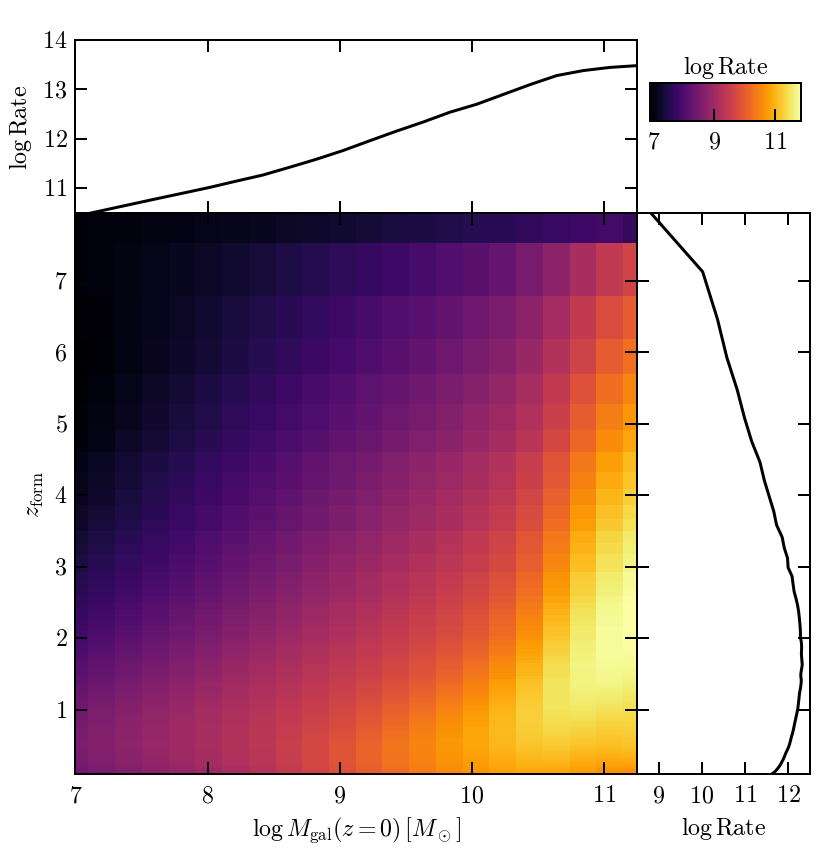

In [164]:
fig = plt.figure(figsize=(12,12))
main_ax = plt.axes([0.1,0.1,0.65,0.65])
top_ax = plt.axes([0.1,0.75,0.65,0.2],sharex=main_ax)
right_ax = plt.axes([0.75,0.1,0.2,0.65],sharey=main_ax)
vertical_cbar = False

if vertical_cbar:
#     cax = plt.axes([0.825,0.825,0.05,0.175])
    cax = plt.axes([0.785,0.815,0.05,0.15])
else:
    cax = plt.axes([0.765,0.825,0.175,0.15])
# cax = plt.axes([0.8,0.8,0.2,0.2])
    
cax.set_axis_off()
plt.setp(top_ax.get_xticklabels(),visible=False)
plt.setp(right_ax.get_yticklabels(),visible=False)

im = main_ax.pcolormesh(Mgrid,Zgrid,log10(Rgrid),cmap='inferno') #,vmin=vmin,vmax=vmax)

top_ax.plot(uniqM,log10(rate_top),'k-',lw=3)
right_ax.plot(log10(rate_right),uniqz,'k-',lw=3)

main_ax.set_xlabel(r'$\log\,M_\mathrm{gal}(z = 0)\,[M_\odot]$',fontsize=24)
main_ax.set_ylabel(r'$z_\mathrm{form}$',fontsize=24)
right_ax.set_xlabel(r'$\log\,\mathrm{Rate}$',fontsize=24)
top_ax.set_ylabel(r'$\log\,\mathrm{Rate}$',fontsize=24)

main_ax.set_xticks(xtickloc)
main_ax.set_xticklabels(xtickstr)

main_ax.set_yticks(ytickloc)
main_ax.set_yticklabels(ytickstr)

main_ax.set_xlim(logM.min(),logM.max())
top_ax.set_xlim(main_ax.get_xlim())

main_ax.set_ylim(zform.min(),zform.max())
right_ax.set_ylim(main_ax.get_ylim())

top_ax.set_ylim(10.5,14)
right_ax.set_xlim(8.5,12.5)

top_ax.set_yticks(toptickloc)
top_ax.set_yticklabels(toptickstr)

right_ax.set_xticks(righttickloc)
right_ax.set_xticklabels(righttickstr)


# loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
# right_ax.xaxis.set_major_locator(loc)
# top_ax.yaxis.set_major_locator(loc)

# norm = mpl.colors.Normalize(vmin=min(log10(Rgrid.flatten())), vmax=max(log10(Rgrid.flatten())))
# cbar = mpl.colorbar.ColorbarBase(cax,cmap='inferno',norm=norm,orientation='horizontal')
# cbar.set_label('test')

cbar = plt.colorbar(im,orientation='horizontal',fraction=0.5,aspect=4)

cbar.set_label(r'$\log\,\mathrm{Rate}$',fontsize=24,labelpad=-100,horizontalalignment='center')
cbar.set_ticks(ctickloc)
cbar.set_ticklabels(ctickstr)

# cax.set_xlabel(r'$\log_{10}(Rate)$',fontsize=24)
# plt.figtext(0.81,0.815+0.155,r'$\log\,\mathrm{Rate}$',fontsize=24,ha='left',va='bottom')

plt.savefig(outname)